# Task 1
Implement a function for DFT in Python. Generate some sinusoidal signals and verify your function works correctly.

### Solution
DFT decomposes a signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The formula of the discrete fourier transform is:

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$

where
- N = amount of samples
- n = current sample, where $n∈[0,N-1]$
- k = current frequency, where $k∈[0,N-1]$
- $x_n$ = the signal's value at sample n
- $X_k$ = The DFT which include information of both amplitude and phase

**My parameters for DFT formula are:**
- sampling rate $(f_s) = 100 S/s$
- amount of samples $(N) = 100$ 

As an **example for testing** of the DFT algorithm, I used the signal:
$x = 5\cdot sin(2\pi t)+sin(10\pi t)+0.1\cdot sin(20\pi t)$.

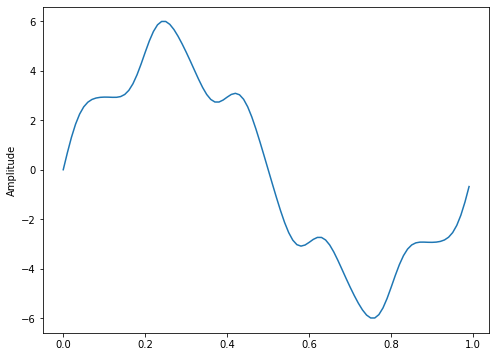

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f_s = 100 # sampling rate = amount of samples
N = 100
delta_t = 1.0/f_s # sampling interval
t = np.arange(0,delta_t*N,delta_t) # array of time ticks from [0,1] with a step delta_t

frequency1 = 1
amplitude1 = 5
x = amplitude1*np.sin(2*np.pi*frequency1*t)

frequency2 = 5
amplitude2 = 1
x += amplitude2*np.sin(2*np.pi*frequency2*t)

frequency3 = 10
amplitude3 = 0.1   
x += amplitude3*np.sin(2*np.pi*frequency3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x)
plt.ylabel('Amplitude')
plt.show()

In [2]:
def dft(x):
  N = len(x) # amount of samples
  X = []
  for k in range(0, N): #iterate over indeces of frequenciess
    sum = 0 
    for n in range(0, N): #iterate over indeces of samples
      e = np.exp(-2j * np.pi * k * n / N)
      sum += e*x[n]
    X.append(sum)

  return np.array(X)

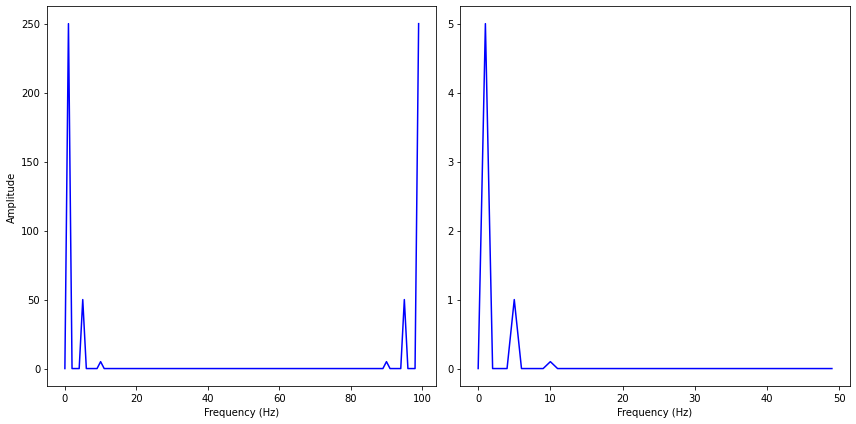

In [3]:
X = dft(x) # compute the result of the DFT 

n = np.arange(N)
T = N/f_s
frequencies = n/T # normalization of frequencies

N_half = N//2
frequencies_half = frequencies[:N_half]
X_half = X[:N_half]/N_half # take only a half of measurements due to symmetricity of the result

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(frequencies, abs(X), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.plot(frequencies_half, abs(X_half), 'b')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Note
We can observe that the resultant graph of the DFT is symmetric by the point where frequency is equal to the half of the sampling rate. This frequency is called **Nyquist frequency**.\
According to the **Nyquist-Shannon sampling theorem**, if we want to measure the highest frequency of the signal we should take the sampling rate slightly greater than this highest frequency doubled.

Also, frequencies should be normalized by dividing each frequency's value into the number of sample points.  


### Conclusion
The graph of results shows us amplitudes (y axis) and frequencies (x axis) of simple signals after the decomposition of the single signal into three sinusoidal signals.  




# Task 2
Produce examples of spectral leakage in the DFT spectrum. Generate a signal with three sinusoidal components of equal amplitude, two of which produce spectral leakage, and the third does not. Explain how the amplitudes of these sinusoidal signals correspond in the frequency domain.

### Solution
**Spectral Leakage** is a phenomenon occuring when a non-integer number of periods of a signal is sent to the DFT. Spectral leakage lets a single-tone signal be spread among several frequencies after the DFT operation. This makes it hard to find the actual frequency of the signal.

- Generated sinusiodal signals have $A=1$ and $f_1=3, f_2=5, f_3=10$

*To check whether there is a leakage, I used a formula:*
$\frac{f}{\Delta_f} = \frac{fN}{f_s}$ 

$\Delta_f$ is a frequency resolution, showing how frequency bins are spaced (what is the distance between two adjacent frequency bins). 

$N$ is amount of samples.

$f_s$ is sampling rate.

Overall, the formula counts the amount of full sinusoid's periods. *If the result of the formula is an integer number, then there is no leakage. Otherwise, the spectral leakage occurs.* 

- So, spectral leakage is produced by frequencies $f_2, f_3$ 

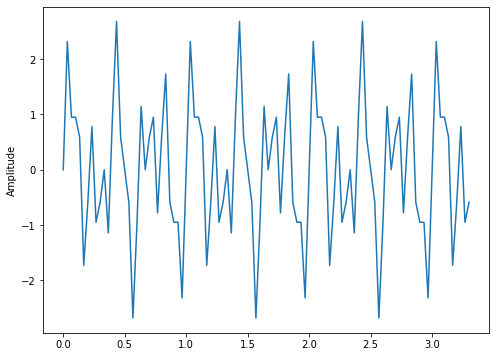

In [4]:
f_s = 30 # sampling rate 
N = 100 # amount of samples
delta_t = 1.0/f_s # sampling interval
t = np.arange(0,delta_t*N,delta_t) 

amplitude = 1
frequency1 = 3
frequency2 = 5
frequency3 = 10
sin_signal = amplitude*np.sin(2*np.pi*frequency1*t) + amplitude*np.sin(2*np.pi*frequency2*t) + amplitude*np.sin(2*np.pi*frequency3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, sin_signal)
plt.ylabel('Amplitude')
plt.show()

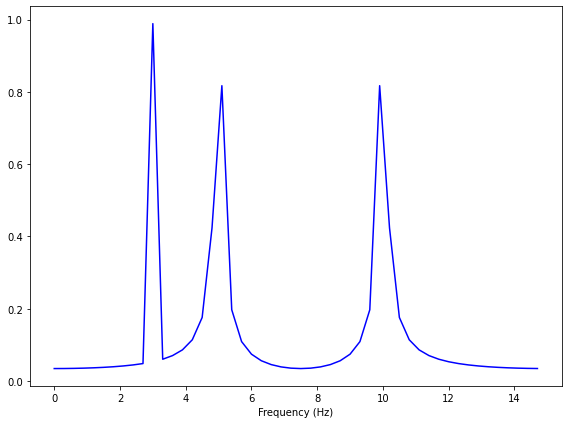

In [5]:
X = dft(sin_signal) # computing the result of the DFT 

n = np.arange(N)
T = N/f_s
frequencies = n/T

N_half = N//2
frequencies_half = frequencies[:N_half]
X_half = X[:N_half]/N_half

plt.figure(figsize = (8, 6))
plt.plot(frequencies_half, abs(X_half), 'b')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Conclusion
In the graph, there is a clear peek for the frequency $f_1=3$, but for frequencies $f_2, f_3$ we see some distortion. Such curvy peeks for $f_2, f_3$ appear because discontinuity occurs and some energy from samples "leaks" out to the surrounding frequency bins.

# Task 3
In a time range of 0.5 seconds, plot cosine signal $x_1(n)$ with a frequency $f_1=190Hz$ and amplitude $A_1=0.5$, sampled at a rate of $f_s=200 S/s$, and cosine signal $x_2(n)$ with $f_2=10Hz$
and amplitude $A_2=2$ sampled at the same $f_s$.
Compute DFT of these signals. Describe observations.
By adjusting the sampling rate, make the DFT reflect the correct frequency for both sinusoidal components.

### Solution
In this task, we can observe another interesting phenomenon - aliasing. 

**Aliasing** is an effect when different signals become indistinguishable from each other when sampled incorrectly. This usually appears when a signal with high frequencies is sampled with inappropriately low sampling rate. 



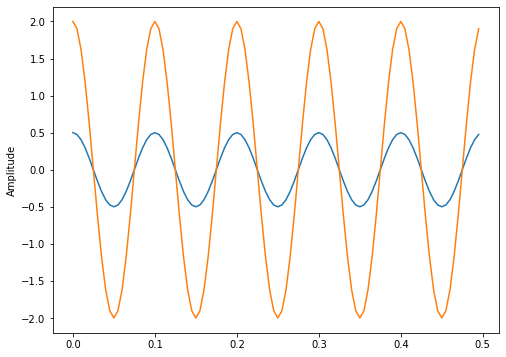

In [ ]:
f_s = 200 # sampling rate 
N = 100 # amount of samples
delta_t = 1.0/f_s # sampling interval
t = np.arange(0,0.5,delta_t) 

amplitude1 = 0.5
frequency1 = 190
amplitude2 = 2
frequency2 = 10

cos_signal1 = amplitude1*np.cos(2*np.pi*frequency1*t)
cos_signal2 = amplitude2*np.cos(2*np.pi*frequency2*t)

plt.figure(figsize = (8, 6))
plt.plot(t, cos_signal1)
plt.plot(t, cos_signal2)
plt.ylabel('Amplitude')
plt.show()

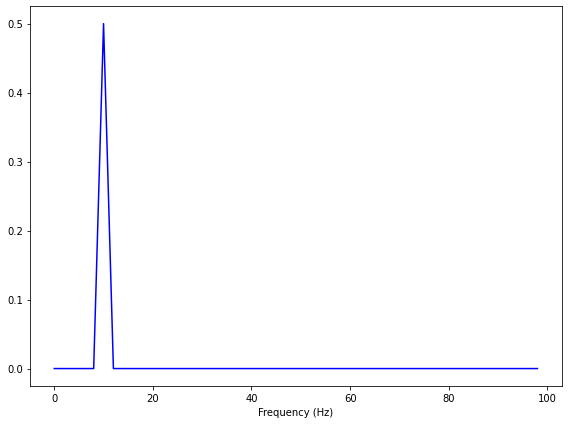

In [ ]:
X1 = dft(cos_signal1) 

n = np.arange(N)
T = N/f_s
frequencies = n/T
N_half = N//2
frequencies_half = frequencies[:N_half]

X1_half = X1[:N_half]/N_half
plt.figure(figsize = (8, 6))
plt.plot(frequencies_half, abs(X1_half), 'b')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


### Note
Frequency of the signal is $190 Hz$ and the sampling frequency is $200 Hz$. In such case, the graph of DFT shows *incorrect results*, because our *sampling rate is too small*.

According to the **Nyquist-Shannon Sampling Theorem**, we should choose a sampling rate $f_s$ slightly greater than the doubled maximum frequency $f_{max}$ of the original signal to prevent frequencies from aliasing or destruction.

So, we should take ($f_s > 190\cdot 2$) $Hz$ to get correct results after DFT. 

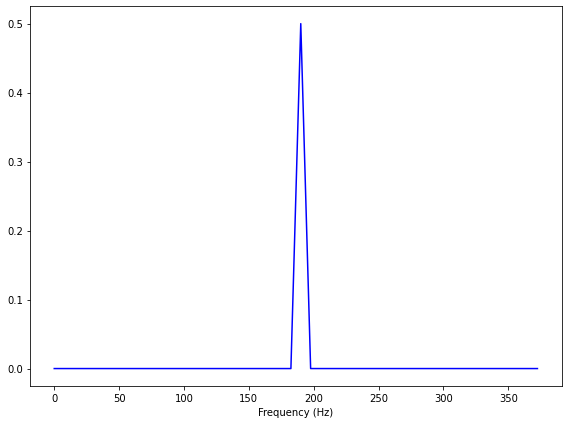

In [ ]:
N = 100 # number of samples
f_s = 760 # sampling rate
step_size = (2*np.pi*frequency1)/f_s
samples = np.arange(0, N)*step_size
cos_signal1 = amplitude1*np.cos(samples)

X1 = dft(cos_signal1)
n = np.arange(N)
T = N/f_s
frequencies = n/T
frequencies_half = frequencies[:N//2]

X1_half = X1[:N//2]/(N//2)
plt.figure(figsize = (8, 6))
plt.plot(frequencies_half, abs(X1_half), 'b')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Note
Now, the $f_s = 760$ and $f_s > 2f_{max} $ for the first cosine signal. 

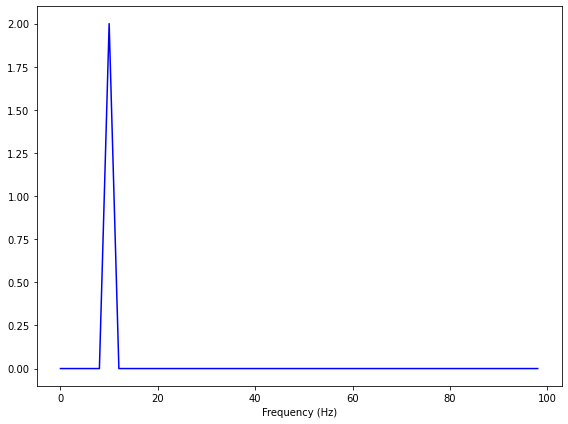

In [ ]:
f_s = 200 # sampling rate 
N = 100
n = np.arange(N)
T = N/f_s
frequencies = n/T
N_half = N//2
frequencies_half = frequencies[:N_half]

X2 = dft(cos_signal2) 
X2_half = X2[:N_half]/N_half

plt.figure(figsize = (8, 6))
plt.plot(frequencies_half, abs(X2_half), 'b')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

### Note
Frequency of the signal is $10 Hz$ and the sampling frequency is $200 Hz$. In such case, the graph of DFT shows correct results, because our sampling rate is big enough: $f_s > 10\cdot 2$

### Conclusion
If aliasing occurs we lose important information about the signal and its frequencies, and we even get the wrong representation of the signal. That's why one needs to use the Nyquist-Shannon Sampling Theorem to select the correct sampling rate. 

# Task 4
Show that basis vectors for DFT are orthogonal.

### Solution
- We need to prove:\
$\frac{1}{N}\sum_{n=0}^{N-1}(e^{-2j\pi kn/N})^{*}\cdot e^{-2j\pi k'n/N} \neq 0 \Longleftrightarrow k = k'$

- After convolution we have: $(e^{-2j\pi kn/N})^{*}= e^{2j\pi kn/N}$

- We consider two cases: $k = k'$ and $k \neq k'$ \


- $k = k'$:\
$\frac{1}{N}\sum_{n=0}^{N-1}e^{2j\pi kn/N}\cdot e^{-2j\pi kn/N} = \frac{1}{N}\sum_{n=0}^{N-1} e^0 = 1$

- Here we can notice a geometric progression when
$k \neq k'$:\
$\frac{1}{N}\sum_{n=0}^{N-1}e^{2j\pi (k-k')n/N} = \frac{1}{N}\frac{1-W^{N(k-k')}}{1-W^{(k-k')}}$

Note that: $W^{N(k-k')}= cos(2\pi (k-k'))+j\cdot sin(2\pi (k-k'))$\
$sin(2\pi (k-k'))=0$\
$cos(2\pi (k-k')) = 1$

- Thus, when $k \neq k'$:\
$\frac{1}{N}\sum_{n=0}^{N-1}e^{2j\pi (k-k')n/N} = \frac{1}{N}\frac{1-W^{N(k-k')}}{1-W^{(k-k')}} = 0$

### Conclusion
The expression $\frac{1}{N}\sum_{n=0}^{N-1}(e^{-2j\pi kn/N})^{*}\cdot e^{-2j\pi k'n/N}$ equals to 0 if and only if $k \neq k'$. Meaning that in such a case vectors are orthogonal. 